In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title, ts_name=None):
    ts_id = None
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()

    return dataset, training_dataset

In [4]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [5]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [6]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [7]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [8]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [2]:
# Hum1 Multi - TS LENGTH
dataset_name = 'Humidity Multi'
ts_lengths = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]

In [10]:
# TS LENGTH - RPCA
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
r_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)   

In [11]:
# TS LENGTH - HISTOGRAM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
h_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)    

In [12]:
# TS LENGTH - CLUSTER
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
c_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)    

In [13]:
# TS LENGTH - SVM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
s_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)    

In [14]:
# TS LENGTH - ISOLATION FOREST
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
i_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [15]:
scores = [{ 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [16]:
print(scores)

[{'title': 'RPCA', 'scores': array([[0.298, 0.19 , 0.513],
       [0.827, 0.015, 0.933],
       [0.481, 0.073, 0.676],
       [0.476, 0.06 , 0.657],
       [0.451, 0.056, 0.622],
       [0.451, 0.048, 0.613],
       [0.361, 0.063, 0.511],
       [0.309, 0.081, 0.454],
       [0.241, 0.107, 0.368],
       [0.176, 0.147, 0.283],
       [0.154, 0.158, 0.25 ],
       [0.154, 0.148, 0.247],
       [0.811, 0.006, 0.922],
       [0.813, 0.006, 0.922],
       [0.755, 0.008, 0.887]])}, {'title': 'Histogram', 'scores': array([[0.021, 0.65 , 0.217],
       [0.057, 0.705, 0.23 ],
       [0.033, 0.797, 0.161],
       [0.033, 0.368, 0.188],
       [0.011, 0.494, 0.121],
       [0.006, 0.542, 0.095],
       [0.002, 0.583, 0.073],
       [0.   , 0.561, 0.063],
       [0.   , 0.601, 0.056],
       [0.001, 0.634, 0.048],
       [0.002, 0.667, 0.042],
       [0.003, 0.695, 0.037],
       [0.   , 0.692, 0.068],
       [0.001, 0.704, 0.063],
       [0.001, 0.703, 0.059]])}, {'title': 'Cluster', 'scores': a

In [3]:
import numpy as np
scores = [{'title': 'RPCA', 'scores': np.array([[0.298, 0.19 , 0.513],
       [0.827, 0.015, 0.933],
       [0.481, 0.073, 0.676],
       [0.476, 0.06 , 0.657],
       [0.451, 0.056, 0.622],
       [0.451, 0.048, 0.613],
       [0.361, 0.063, 0.511],
       [0.309, 0.081, 0.454],
       [0.241, 0.107, 0.368],
       [0.176, 0.147, 0.283],
       [0.154, 0.158, 0.25 ],
       [0.154, 0.148, 0.247],
       [0.811, 0.006, 0.922],
       [0.813, 0.006, 0.922],
       [0.755, 0.008, 0.887]])}, {'title': 'Histogram', 'scores': np.array([[0.021, 0.65 , 0.217],
       [0.057, 0.705, 0.23 ],
       [0.033, 0.797, 0.161],
       [0.033, 0.368, 0.188],
       [0.011, 0.494, 0.121],
       [0.006, 0.542, 0.095],
       [0.002, 0.583, 0.073],
       [0.   , 0.561, 0.063],
       [0.   , 0.601, 0.056],
       [0.001, 0.634, 0.048],
       [0.002, 0.667, 0.042],
       [0.003, 0.695, 0.037],
       [0.   , 0.692, 0.068],
       [0.001, 0.704, 0.063],
       [0.001, 0.703, 0.059]])}, {'title': 'Cluster', 'scores': np.array([[1.   , 0.   , 1.   ],
       [1.   , 0.   , 1.   ],
       [0.935, 0.003, 0.979],
       [0.938, 0.002, 0.979],
       [0.94 , 0.002, 0.979],
       [0.942, 0.002, 0.979],
       [0.834, 0.006, 0.92 ],
       [0.779, 0.009, 0.885],
       [0.468, 0.038, 0.622],
       [0.241, 0.101, 0.365],
       [0.195, 0.121, 0.304],
       [0.197, 0.112, 0.302],
       [0.483, 0.021, 0.697],
       [0.487, 0.019, 0.697],
       [0.49 , 0.018, 0.697]])}, {'title': 'SVM', 'scores': np.array([[1.   , 0.   , 1.   ],
       [0.471, 0.055, 0.645],
       [0.561, 0.033, 0.722],
       [0.572, 0.025, 0.722],
       [0.58 , 0.02 , 0.722],
       [0.586, 0.017, 0.722],
       [0.59 , 0.014, 0.722],
       [0.33 , 0.029, 0.566],
       [0.166, 0.059, 0.376],
       [0.054, 0.147, 0.188],
       [0.027, 0.211, 0.128],
       [0.027, 0.203, 0.122],
       [0.077, 0.175, 0.236],
       [0.079, 0.164, 0.233],
       [0.082, 0.153, 0.233]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.287, 0.2  , 0.5  ],
       [0.681, 0.03 , 0.87 ],
       [0.499, 0.057, 0.721],
       [0.251, 0.138, 0.444],
       [0.217, 0.14 , 0.386],
       [0.144, 0.192, 0.277],
       [0.104, 0.209, 0.223],
       [0.081, 0.224, 0.204],
       [0.072, 0.238, 0.183],
       [0.01 , 0.255, 0.099],
       [0.004, 0.323, 0.073],
       [0.004, 0.327, 0.067],
       [0.006, 0.329, 0.105],
       [0.004, 0.357, 0.091],
       [0.004, 0.345, 0.088]])}]

In [4]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [5]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [6]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

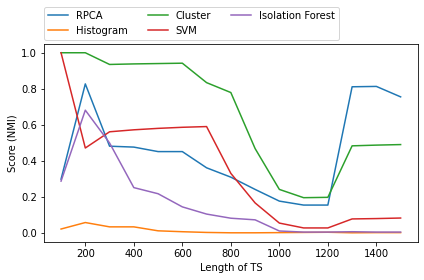

In [7]:
generate_nmi_line_chart(ts_lengths, scores)

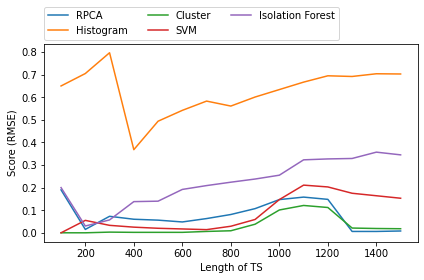

In [8]:
generate_rmse_line_chart(ts_lengths, scores)

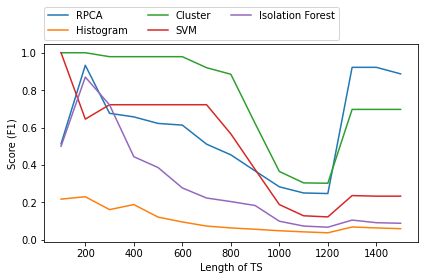

In [9]:
generate_f1_line_chart(ts_lengths, scores)